<a href="https://colab.research.google.com/github/savi3alwis/DATA-6550-Algorithms/blob/main/Module_4_Project_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Discrimination and Algorithmic Bias
## Module 4: Algorithmic Bias
### By: Savi Alwis, Moses Kipkemboi, Muqtasid Qureshi, Pallavi Suram

In [51]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# Load dataset
url = "https://raw.githubusercontent.com/Group4-s2025/DATA-6550-Algorithms/refs/heads/main/Data/mortgage_covenant_data.csv"
df = pd.read_csv(url)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100931 entries, 0 to 100930
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   activity_year                      100931 non-null  int64  
 1   census_tract                       99915 non-null   float64
 2   derived_race                       100931 non-null  object 
 3   action_taken                       100931 non-null  int64  
 4   loan_amount                        100931 non-null  float64
 5   property_value                     83491 non-null   float64
 6   income                             88200 non-null   float64
 7   interest_rate                      78125 non-null   float64
 8   tract_minority_population_percent  100931 non-null  float64
 9   tract_to_msa_income_percentage     100931 non-null  float64
 10  denial_reason-1                    100931 non-null  int64  
 11  covenant_count                     1009

In [54]:
df.head()

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
0,2023,2.703706e+10,Race Not Available,6,185000.0,195000.0,NaN,6.125,40.37,73.48,10,0.0,False,NaN
1,2023,2.714103e+10,Race Not Available,6,375000.0,385000.0,NaN,6.625,10.64,121.26,10,0.0,False,NaN
2,2023,2.702395e+10,Race Not Available,6,105000.0,105000.0,NaN,6.125,8.92,90.13,10,0.0,False,NaN
3,2023,2.717110e+10,Race Not Available,6,285000.0,285000.0,NaN,6.750,13.27,104.37,10,0.0,False,NaN
4,2023,2.715948e+10,Race Not Available,6,175000.0,175000.0,NaN,6.875,5.87,82.22,10,0.0,False,NaN


### Initial Analysis

In [55]:
# Remove null/missing values
df = df.dropna(subset=['property_value', 'income', 'interest_rate', 'census_tract', 'covenant_density'])
df = df[df['derived_race'] != 'Race Not Available']

In [56]:
# Convert 'was_was_approved' from boolean to int
df['was_approved'] = df['was_approved'].astype(int)

In [57]:
# Display updated data
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 6704 entries, 363 to 100922
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   activity_year                      6704 non-null   int64  
 1   census_tract                       6704 non-null   float64
 2   derived_race                       6704 non-null   object 
 3   action_taken                       6704 non-null   int64  
 4   loan_amount                        6704 non-null   float64
 5   property_value                     6704 non-null   float64
 6   income                             6704 non-null   float64
 7   interest_rate                      6704 non-null   float64
 8   tract_minority_population_percent  6704 non-null   float64
 9   tract_to_msa_income_percentage     6704 non-null   float64
 10  denial_reason-1                    6704 non-null   int64  
 11  covenant_count                     6704 non-null   float6

None

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
363,2023,2.705302e+10,White,1,315000.0,325000.0,68.0,6.375,62.20,69.94,10,82.0,1,Medium (51-100)
369,2023,2.705303e+10,Asian,1,365000.0,495000.0,392.0,7.625,12.92,108.89,10,292.0,1,Very High (>200)
373,2023,2.705303e+10,White,1,195000.0,225000.0,53.0,6.875,47.47,77.17,10,87.0,1,Medium (51-100)
403,2023,2.705303e+10,White,1,475000.0,685000.0,221.0,7.250,25.75,106.27,10,119.0,1,High (101-200)
616,2023,2.705303e+10,White,1,335000.0,415000.0,120.0,6.125,12.84,159.62,10,2.0,1,Low (1-50)


In [58]:
# Show count of each race in the 'derived_race' column
race_counts = df['derived_race'].value_counts()
display(race_counts)

# Replace 'Black or African American' with 'Black'
df['derived_race'] = df['derived_race'].replace('Black or African American', 'Black')

# Combine 'American Indian or Alaska Native' and 'Native Hawaiian or Other Pacific Islander' with 'Native American/Pacific Islander'
df['derived_race'] = df['derived_race'].replace({
    'American Indian or Alaska Native': 'Native American/Pacific Islander',
    'Native Hawaiian or Other Pacific Islander': 'Native American/Pacific Islander'
})

# Display the counts
display(race_counts)


,count
derived_race,
White,5434
Black or African American,483
Asian,413
Joint,297
American Indian or Alaska Native,57
2 or more minority races,12
Native Hawaiian or Other Pacific Islander,8


,count
derived_race,
White,5434
Black or African American,483
Asian,413
Joint,297
American Indian or Alaska Native,57
2 or more minority races,12
Native Hawaiian or Other Pacific Islander,8


#### Graphing

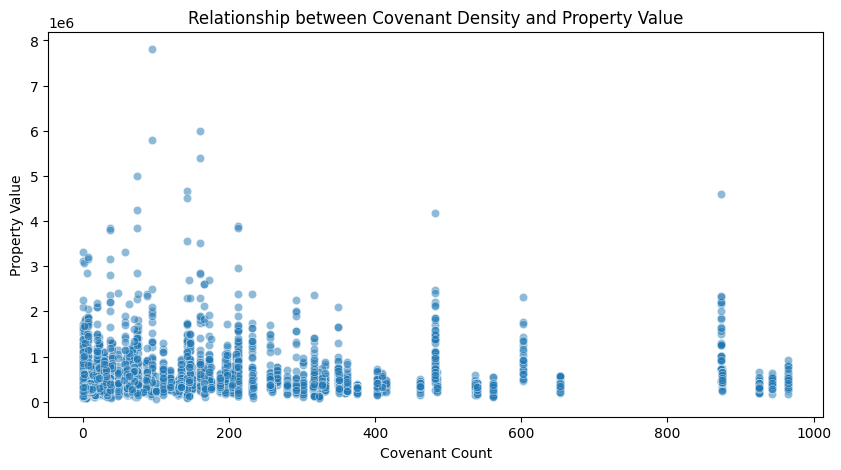

In [59]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='covenant_count', y='property_value', alpha = 0.5)
plt.title("Relationship between Covenant Density and Property Value")
plt.xlabel("Covenant Count")
plt.ylabel("Property Value")
plt.show()